In [117]:
import re
import matplotlib.pyplot as plt
import torch
from helpers import letter_sorted
from helpers import plot_bigrams

In [118]:
with open('data/turkce_isim_veri_seti/tr_isimler.txt', 'r', encoding='utf-8') as file:
    text = file.read()
names = re.split(r'\n', text)

In [119]:
names[:15]

['rukiye',
 'selami',
 'mukaddes',
 'şeyhmus',
 'reyhan',
 'rukyete',
 'kuzey',
 'sadı',
 'nihal',
 'sevin',
 'gönül',
 'kamuran',
 'recep',
 'selman',
 'güzel']

In [120]:
print(len(names))

1175


## Bigram Analysis

### Character Frequencies 

In [121]:
all_chars = ''.join(names)

In [122]:
char_freq ={}
for c in all_chars:
    char_freq[c] = char_freq.get(c, 0) + 1
char_freq = dict(sorted(char_freq.items(), key=lambda t:t[1], reverse=True))
chars = letter_sorted(char_freq)

In [123]:
char_freq

{'a': 899,
 'e': 824,
 'i': 575,
 'n': 507,
 'r': 438,
 'l': 349,
 'm': 344,
 's': 281,
 'y': 262,
 'h': 256,
 'd': 220,
 't': 214,
 'u': 201,
 'ü': 181,
 'b': 172,
 'z': 171,
 'k': 153,
 'f': 121,
 'g': 115,
 'ş': 90,
 'v': 80,
 'c': 71,
 'ı': 59,
 'o': 38,
 'p': 35,
 'ö': 25,
 'ğ': 24,
 'ç': 22,
 'j': 10}

In [124]:
len(char_freq.keys())

29

In [125]:
chars

{'a': 899,
 'b': 172,
 'c': 71,
 'ç': 22,
 'd': 220,
 'e': 824,
 'f': 121,
 'g': 115,
 'ğ': 24,
 'h': 256,
 'ı': 59,
 'i': 575,
 'j': 10,
 'k': 153,
 'l': 349,
 'm': 344,
 'n': 507,
 'o': 38,
 'ö': 25,
 'p': 35,
 'r': 438,
 's': 281,
 'ş': 90,
 't': 214,
 'u': 201,
 'ü': 181,
 'v': 80,
 'y': 262,
 'z': 171}

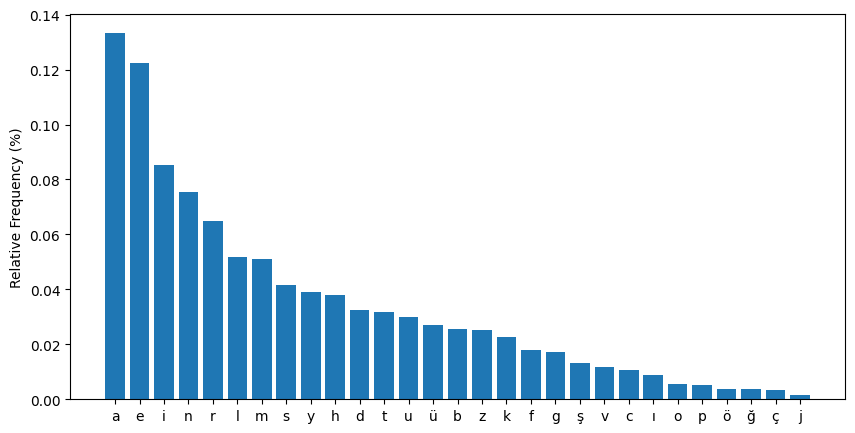

In [126]:
k = [k for k in char_freq.keys()]
v = [v/sum(char_freq.values()) for v in char_freq.values()]

plt.figure(figsize=(10, 5))
plt.bar(k, v)
plt.ylabel("Relative Frequency (%)")
plt.show()

### Bigram Calculation

Let's investigate the first example more closely:

In [127]:
print(names[0])

rukiye


It is important to note that the we need two characters to create bigrams, `f-a-d-i-m-e` where the bigrams become:
```
<NULL> -> f     
f      -> a     
a      -> d     
d      -> i     
i      -> m     
m      -> e     
e      -> <NULL>
```
where the special token `<NULL>` represents the non-existent characters. Here, instead of the `<NULL>` token, we can use start and finish tokens `<B> (BAS)` and `<S> (SON)`, respectively.
```
<B>    -> f  
f      -> a  
a      -> d  
d      -> i  
i      -> m  
m      -> e  
e      -> <S>
```

In [128]:
B_dict = {} # Bigram data
for n in names:
    token = ['<B>'] + list(n) + ['<S>']
    for char1, char2 in zip(token, token[1:]):
        print(char1 + ' -> ' + char2)
        bigram = (char1, char2)
        B_dict[bigram] = B_dict.get(bigram, 0) + 1

<B> -> r
r -> u
u -> k
k -> i
i -> y
y -> e
e -> <S>
<B> -> s
s -> e
e -> l
l -> a
a -> m
m -> i
i -> <S>
<B> -> m
m -> u
u -> k
k -> a
a -> d
d -> d
d -> e
e -> s
s -> <S>
<B> -> ş
ş -> e
e -> y
y -> h
h -> m
m -> u
u -> s
s -> <S>
<B> -> r
r -> e
e -> y
y -> h
h -> a
a -> n
n -> <S>
<B> -> r
r -> u
u -> k
k -> y
y -> e
e -> t
t -> e
e -> <S>
<B> -> k
k -> u
u -> z
z -> e
e -> y
y -> <S>
<B> -> s
s -> a
a -> d
d -> ı
ı -> <S>
<B> -> n
n -> i
i -> h
h -> a
a -> l
l -> <S>
<B> -> s
s -> e
e -> v
v -> i
i -> n
n -> <S>
<B> -> g
g -> ö
ö -> n
n -> ü
ü -> l
l -> <S>
<B> -> k
k -> a
a -> m
m -> u
u -> r
r -> a
a -> n
n -> <S>
<B> -> r
r -> e
e -> c
c -> e
e -> p
p -> <S>
<B> -> s
s -> e
e -> l
l -> m
m -> a
a -> n
n -> <S>
<B> -> g
g -> ü
ü -> z
z -> e
e -> l
l -> <S>
<B> -> k
k -> i
i -> b
b -> a
a -> r
r -> <S>
<B> -> m
m -> e
e -> l
l -> i
i -> k
k -> e
e -> <S>
<B> -> b
b -> a
a -> ş
ş -> a
a -> k
k -> <S>
<B> -> l
l -> e
e -> y
y -> m
m -> u
u -> n
n -> <S>
<B> -> b
b -> e
e -> s
s -> 

In [129]:
B_freq = sorted(B_dict.items(), key=lambda item:item[1], reverse=True)
B_freq

[(('n', '<S>'), 263),
 (('e', '<S>'), 202),
 (('a', 'n'), 193),
 (('h', 'a'), 151),
 (('a', '<S>'), 131),
 (('e', 'r'), 122),
 (('<B>', 's'), 119),
 (('<B>', 'm'), 112),
 (('r', '<S>'), 107),
 (('<B>', 'n'), 96),
 (('<B>', 'a'), 96),
 (('m', 'e'), 93),
 (('s', 'e'), 92),
 (('t', '<S>'), 90),
 (('i', 'n'), 85),
 (('<B>', 'b'), 78),
 (('l', '<S>'), 76),
 (('a', 'y'), 75),
 (('<B>', 'h'), 73),
 (('ü', 'l'), 68),
 (('<B>', 'e'), 68),
 (('r', 'a'), 67),
 (('y', 'e'), 66),
 (('e', 'l'), 66),
 (('r', 'e'), 65),
 (('n', 'e'), 65),
 (('<B>', 'g'), 64),
 (('r', 'i'), 64),
 (('g', 'ü'), 63),
 (('e', 'y'), 61),
 (('b', 'e'), 61),
 (('u', 'r'), 60),
 (('a', 'h'), 60),
 (('a', 'l'), 59),
 (('l', 'i'), 59),
 (('e', 'n'), 59),
 (('d', 'i'), 59),
 (('i', '<S>'), 58),
 (('e', 'm'), 58),
 (('i', 'y'), 57),
 (('s', 'a'), 57),
 (('m', '<S>'), 57),
 (('n', 'a'), 56),
 (('e', 't'), 55),
 (('d', 'e'), 54),
 (('a', 'r'), 54),
 (('i', 'l'), 52),
 (('i', 'r'), 51),
 (('l', 'a'), 50),
 (('m', 'i'), 50),
 (('m', '

Instead of having a dictionary/list storing the bigram information in a 2D array would benefit us much better. In order to do that, we might need two look-up tables, which would map characters-to-indices and indices-to-characters:

In [130]:
# Indice to char mapping
char2ind = {c:i for i, c in enumerate(chars.keys())}
char2ind['<B>'] = 29
char2ind['<S>'] = 30
char2ind

{'a': 0,
 'b': 1,
 'c': 2,
 'ç': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'ğ': 8,
 'h': 9,
 'ı': 10,
 'i': 11,
 'j': 12,
 'k': 13,
 'l': 14,
 'm': 15,
 'n': 16,
 'o': 17,
 'ö': 18,
 'p': 19,
 'r': 20,
 's': 21,
 'ş': 22,
 't': 23,
 'u': 24,
 'ü': 25,
 'v': 26,
 'y': 27,
 'z': 28,
 '<B>': 29,
 '<S>': 30}

In [131]:
ind2char = {i:c for i, c in enumerate(char2ind.keys())}
ind2char

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'ç',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'ğ',
 9: 'h',
 10: 'ı',
 11: 'i',
 12: 'j',
 13: 'k',
 14: 'l',
 15: 'm',
 16: 'n',
 17: 'o',
 18: 'ö',
 19: 'p',
 20: 'r',
 21: 's',
 22: 'ş',
 23: 't',
 24: 'u',
 25: 'ü',
 26: 'v',
 27: 'y',
 28: 'z',
 29: '<B>',
 30: '<S>'}

In [132]:
char2ind['a']

0

In [133]:
nchars = len(char2ind.keys())
B = torch.zeros((nchars, nchars))
for idx in range(len(B_freq)):
    bigram = B_freq[idx][0]
    gram1 = bigram[0]
    gram2 = bigram[1]
    B[char2ind[gram1], char2ind[gram2]] = B_freq[idx][1]

In [134]:
B

tensor([[  3.,  34.,   7.,   1.,  38.,   1.,  13.,   4.,   3.,  60.,   0.,  16.,
           0.,  20.,  59.,  36., 193.,   0.,   0.,   6.,  54.,  38.,  10.,  50.,
           0.,   0.,   7.,  75.,  40.,   0., 131.],
        [ 35.,   1.,   0.,   0.,  15.,  61.,   0.,   0.,   0.,   0.,   1.,  29.,
           0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,  10.,   0.,   0.,   0.,
          11.,   5.,   0.,   0.,   0.,   0.,   3.],
        [ 26.,   0.,   0.,   0.,   0.,  25.,   0.,   0.,   0.,   0.,   1.,  11.,
           0.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
           2.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  3.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   2.,   6.,
           0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,   0.,   0.,   0.,   4.],
        [ 39.,   0.,   0.,   0.,  12.,  54.,   0.,   0.,   0.,   0.,  12.,  59.,
           0.,   0.,   0.,   0.,   1.,   5.,   2.,   0.,   7., 

In [135]:
B.shape

torch.Size([31, 31])

Let's visualize the bigram frequency statistics

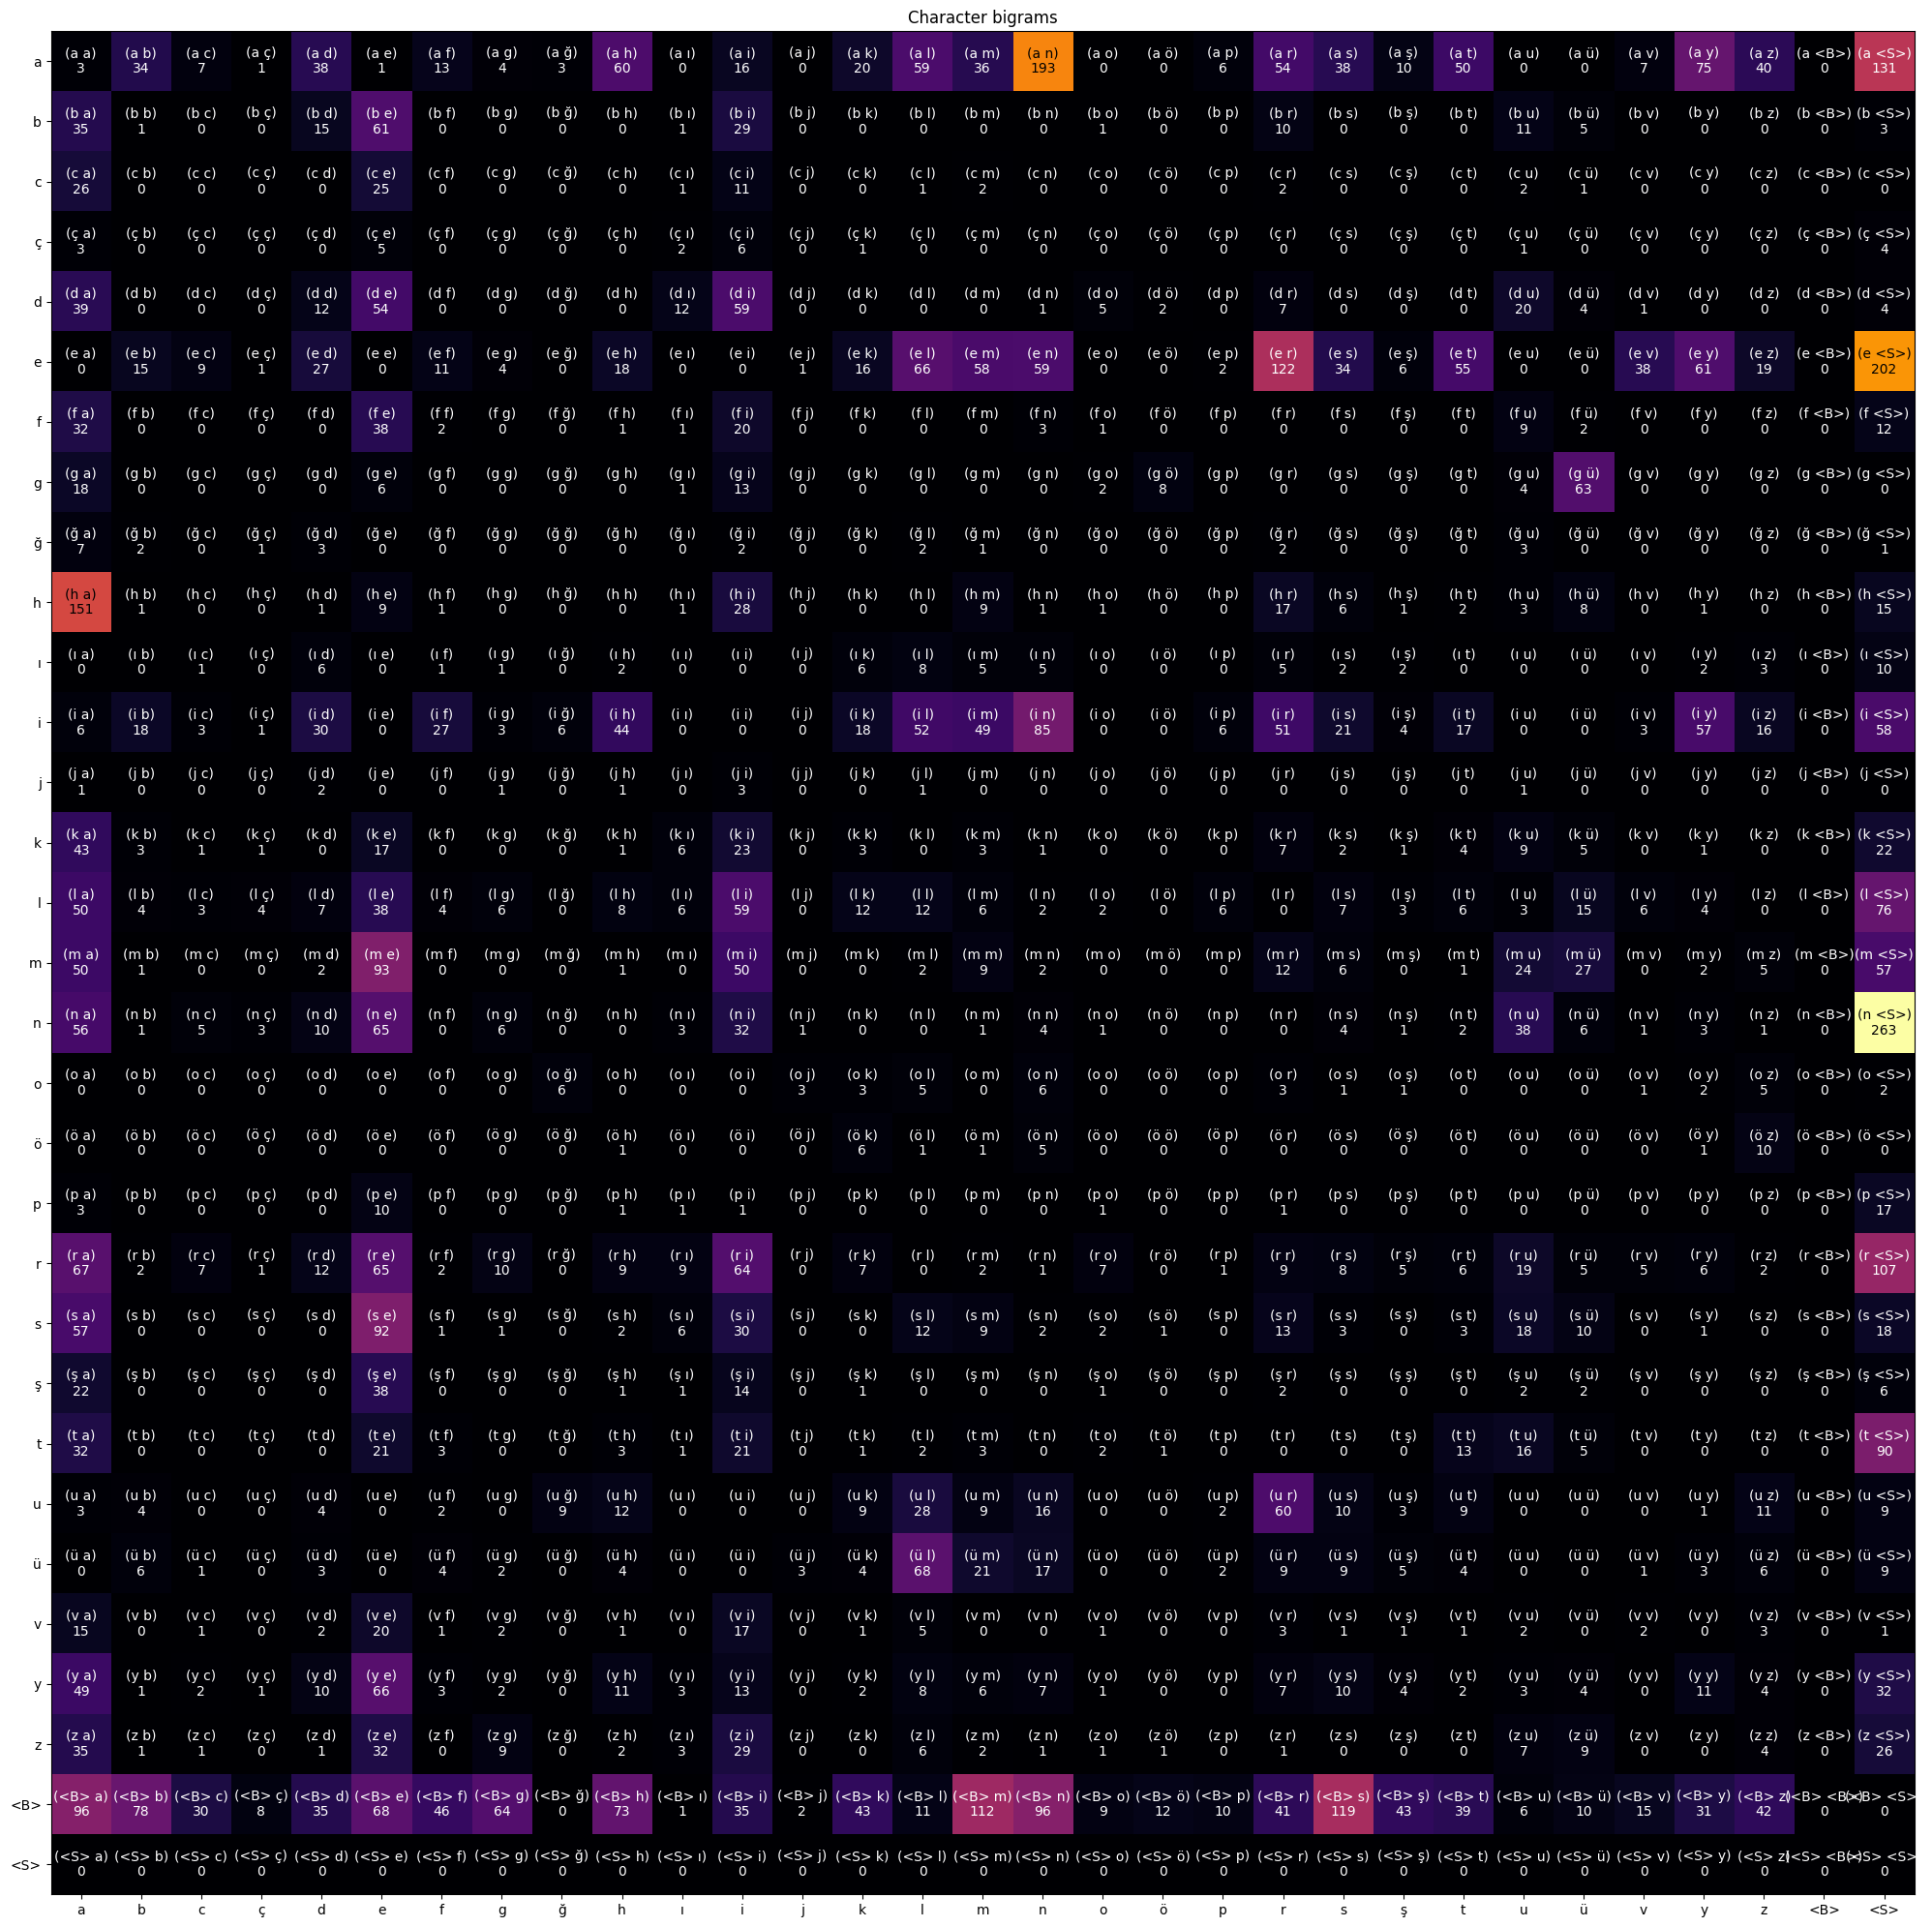

In [136]:
ext_chars = list(char2ind.keys())
fig, ax = plt.subplots(figsize=(25, 25))
ax = plot_bigrams(B, ext_chars, ax)
plt.show()

Let's confirm the results manually:

In [137]:
first_letter = {}
for n in names:
    first_letter[n[0]] = first_letter.get(n[0], 0) + 1
first_letter = dict(sorted(first_letter.items(), key=lambda it:it[1], reverse=True))

In [138]:
first_letter

{'s': 119,
 'm': 112,
 'n': 96,
 'a': 96,
 'b': 78,
 'h': 73,
 'e': 68,
 'g': 64,
 'f': 46,
 'ş': 43,
 'k': 43,
 'z': 42,
 'r': 41,
 't': 39,
 'd': 35,
 'i': 35,
 'y': 31,
 'c': 30,
 'v': 15,
 'ö': 12,
 'l': 11,
 'ü': 10,
 'p': 10,
 'o': 9,
 'ç': 8,
 'u': 6,
 'j': 2,
 'ı': 1}

Let's take a look at the bigrams table above:
- We notice that a name would never start with an end token (`<S>`), thus, the row consists of all zeros.
- Similarly, we have a column of zeros since no name will ever end with the starting token (`<B>`), thus, the column consists of all zeros.
- The only valid combinations for the the tokens are:
    - `<B>abc<S>` where any combination of `<S>abc<B>` are invalid.
    - Also, `<B><S>`, where it is a name with no letters.

We can use a better approach to fix those problems. Instead of having two special tokens we will have a single `.` token to imply it is the beginning/end of a word.

In [139]:
# Indice to char mapping
char2ind = {}
char2ind = {c:i for i, c in enumerate(chars, start=1)}
char2ind['.'] = 0
char2ind = dict(sorted(char2ind.items(), key=lambda item:item[1]))
char2ind

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'ç': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'ğ': 9,
 'h': 10,
 'ı': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'ö': 19,
 'p': 20,
 'r': 21,
 's': 22,
 'ş': 23,
 't': 24,
 'u': 25,
 'ü': 26,
 'v': 27,
 'y': 28,
 'z': 29}

In [140]:
ind2char = {}
ind2char = {i:c for c, i in char2ind.items()}
ind2char

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'ç',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'ğ',
 10: 'h',
 11: 'ı',
 12: 'i',
 13: 'j',
 14: 'k',
 15: 'l',
 16: 'm',
 17: 'n',
 18: 'o',
 19: 'ö',
 20: 'p',
 21: 'r',
 22: 's',
 23: 'ş',
 24: 't',
 25: 'u',
 26: 'ü',
 27: 'v',
 28: 'y',
 29: 'z'}

In [141]:
token_count = {}
for name in names:
    token = ["."] + list(name) + ["."]
    for char1, char2 in zip(token, token[1:]):
        token_count[(char1, char2)] = token_count.get((char1, char2), 0) + 1
token_count = dict(sorted(token_count.items(), key=lambda item:item[1], reverse=True))
token_count

{('n', '.'): 263,
 ('e', '.'): 202,
 ('a', 'n'): 193,
 ('h', 'a'): 151,
 ('a', '.'): 131,
 ('e', 'r'): 122,
 ('.', 's'): 119,
 ('.', 'm'): 112,
 ('r', '.'): 107,
 ('.', 'n'): 96,
 ('.', 'a'): 96,
 ('m', 'e'): 93,
 ('s', 'e'): 92,
 ('t', '.'): 90,
 ('i', 'n'): 85,
 ('.', 'b'): 78,
 ('l', '.'): 76,
 ('a', 'y'): 75,
 ('.', 'h'): 73,
 ('ü', 'l'): 68,
 ('.', 'e'): 68,
 ('r', 'a'): 67,
 ('y', 'e'): 66,
 ('e', 'l'): 66,
 ('r', 'e'): 65,
 ('n', 'e'): 65,
 ('.', 'g'): 64,
 ('r', 'i'): 64,
 ('g', 'ü'): 63,
 ('e', 'y'): 61,
 ('b', 'e'): 61,
 ('u', 'r'): 60,
 ('a', 'h'): 60,
 ('a', 'l'): 59,
 ('l', 'i'): 59,
 ('e', 'n'): 59,
 ('d', 'i'): 59,
 ('i', '.'): 58,
 ('e', 'm'): 58,
 ('i', 'y'): 57,
 ('s', 'a'): 57,
 ('m', '.'): 57,
 ('n', 'a'): 56,
 ('e', 't'): 55,
 ('d', 'e'): 54,
 ('a', 'r'): 54,
 ('i', 'l'): 52,
 ('i', 'r'): 51,
 ('l', 'a'): 50,
 ('m', 'i'): 50,
 ('m', 'a'): 50,
 ('a', 't'): 50,
 ('i', 'm'): 49,
 ('y', 'a'): 49,
 ('.', 'f'): 46,
 ('i', 'h'): 44,
 ('k', 'a'): 43,
 ('.', 'ş'): 43,
 ('.'

In [142]:
nchars = len(char2ind.keys())
B = torch.zeros((nchars, nchars))
for idx in range(len(token_count.keys())):
    bigram = list(token_count.keys())[idx]
    gram1 = bigram[0]
    gram2 = bigram[1]
    B[char2ind[gram1], char2ind[gram2]] = list(token_count.values())[idx]
B

tensor([[  0.,  96.,  78.,  30.,   8.,  35.,  68.,  46.,  64.,   0.,  73.,   1.,
          35.,   2.,  43.,  11., 112.,  96.,   9.,  12.,  10.,  41., 119.,  43.,
          39.,   6.,  10.,  15.,  31.,  42.],
        [131.,   3.,  34.,   7.,   1.,  38.,   1.,  13.,   4.,   3.,  60.,   0.,
          16.,   0.,  20.,  59.,  36., 193.,   0.,   0.,   6.,  54.,  38.,  10.,
          50.,   0.,   0.,   7.,  75.,  40.],
        [  3.,  35.,   1.,   0.,   0.,  15.,  61.,   0.,   0.,   0.,   0.,   1.,
          29.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,  10.,   0.,   0.,
           0.,  11.,   5.,   0.,   0.,   0.],
        [  0.,  26.,   0.,   0.,   0.,   0.,  25.,   0.,   0.,   0.,   0.,   1.,
          11.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
           0.,   2.,   1.,   0.,   0.,   0.],
        [  4.,   3.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   2.,
           6.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
      

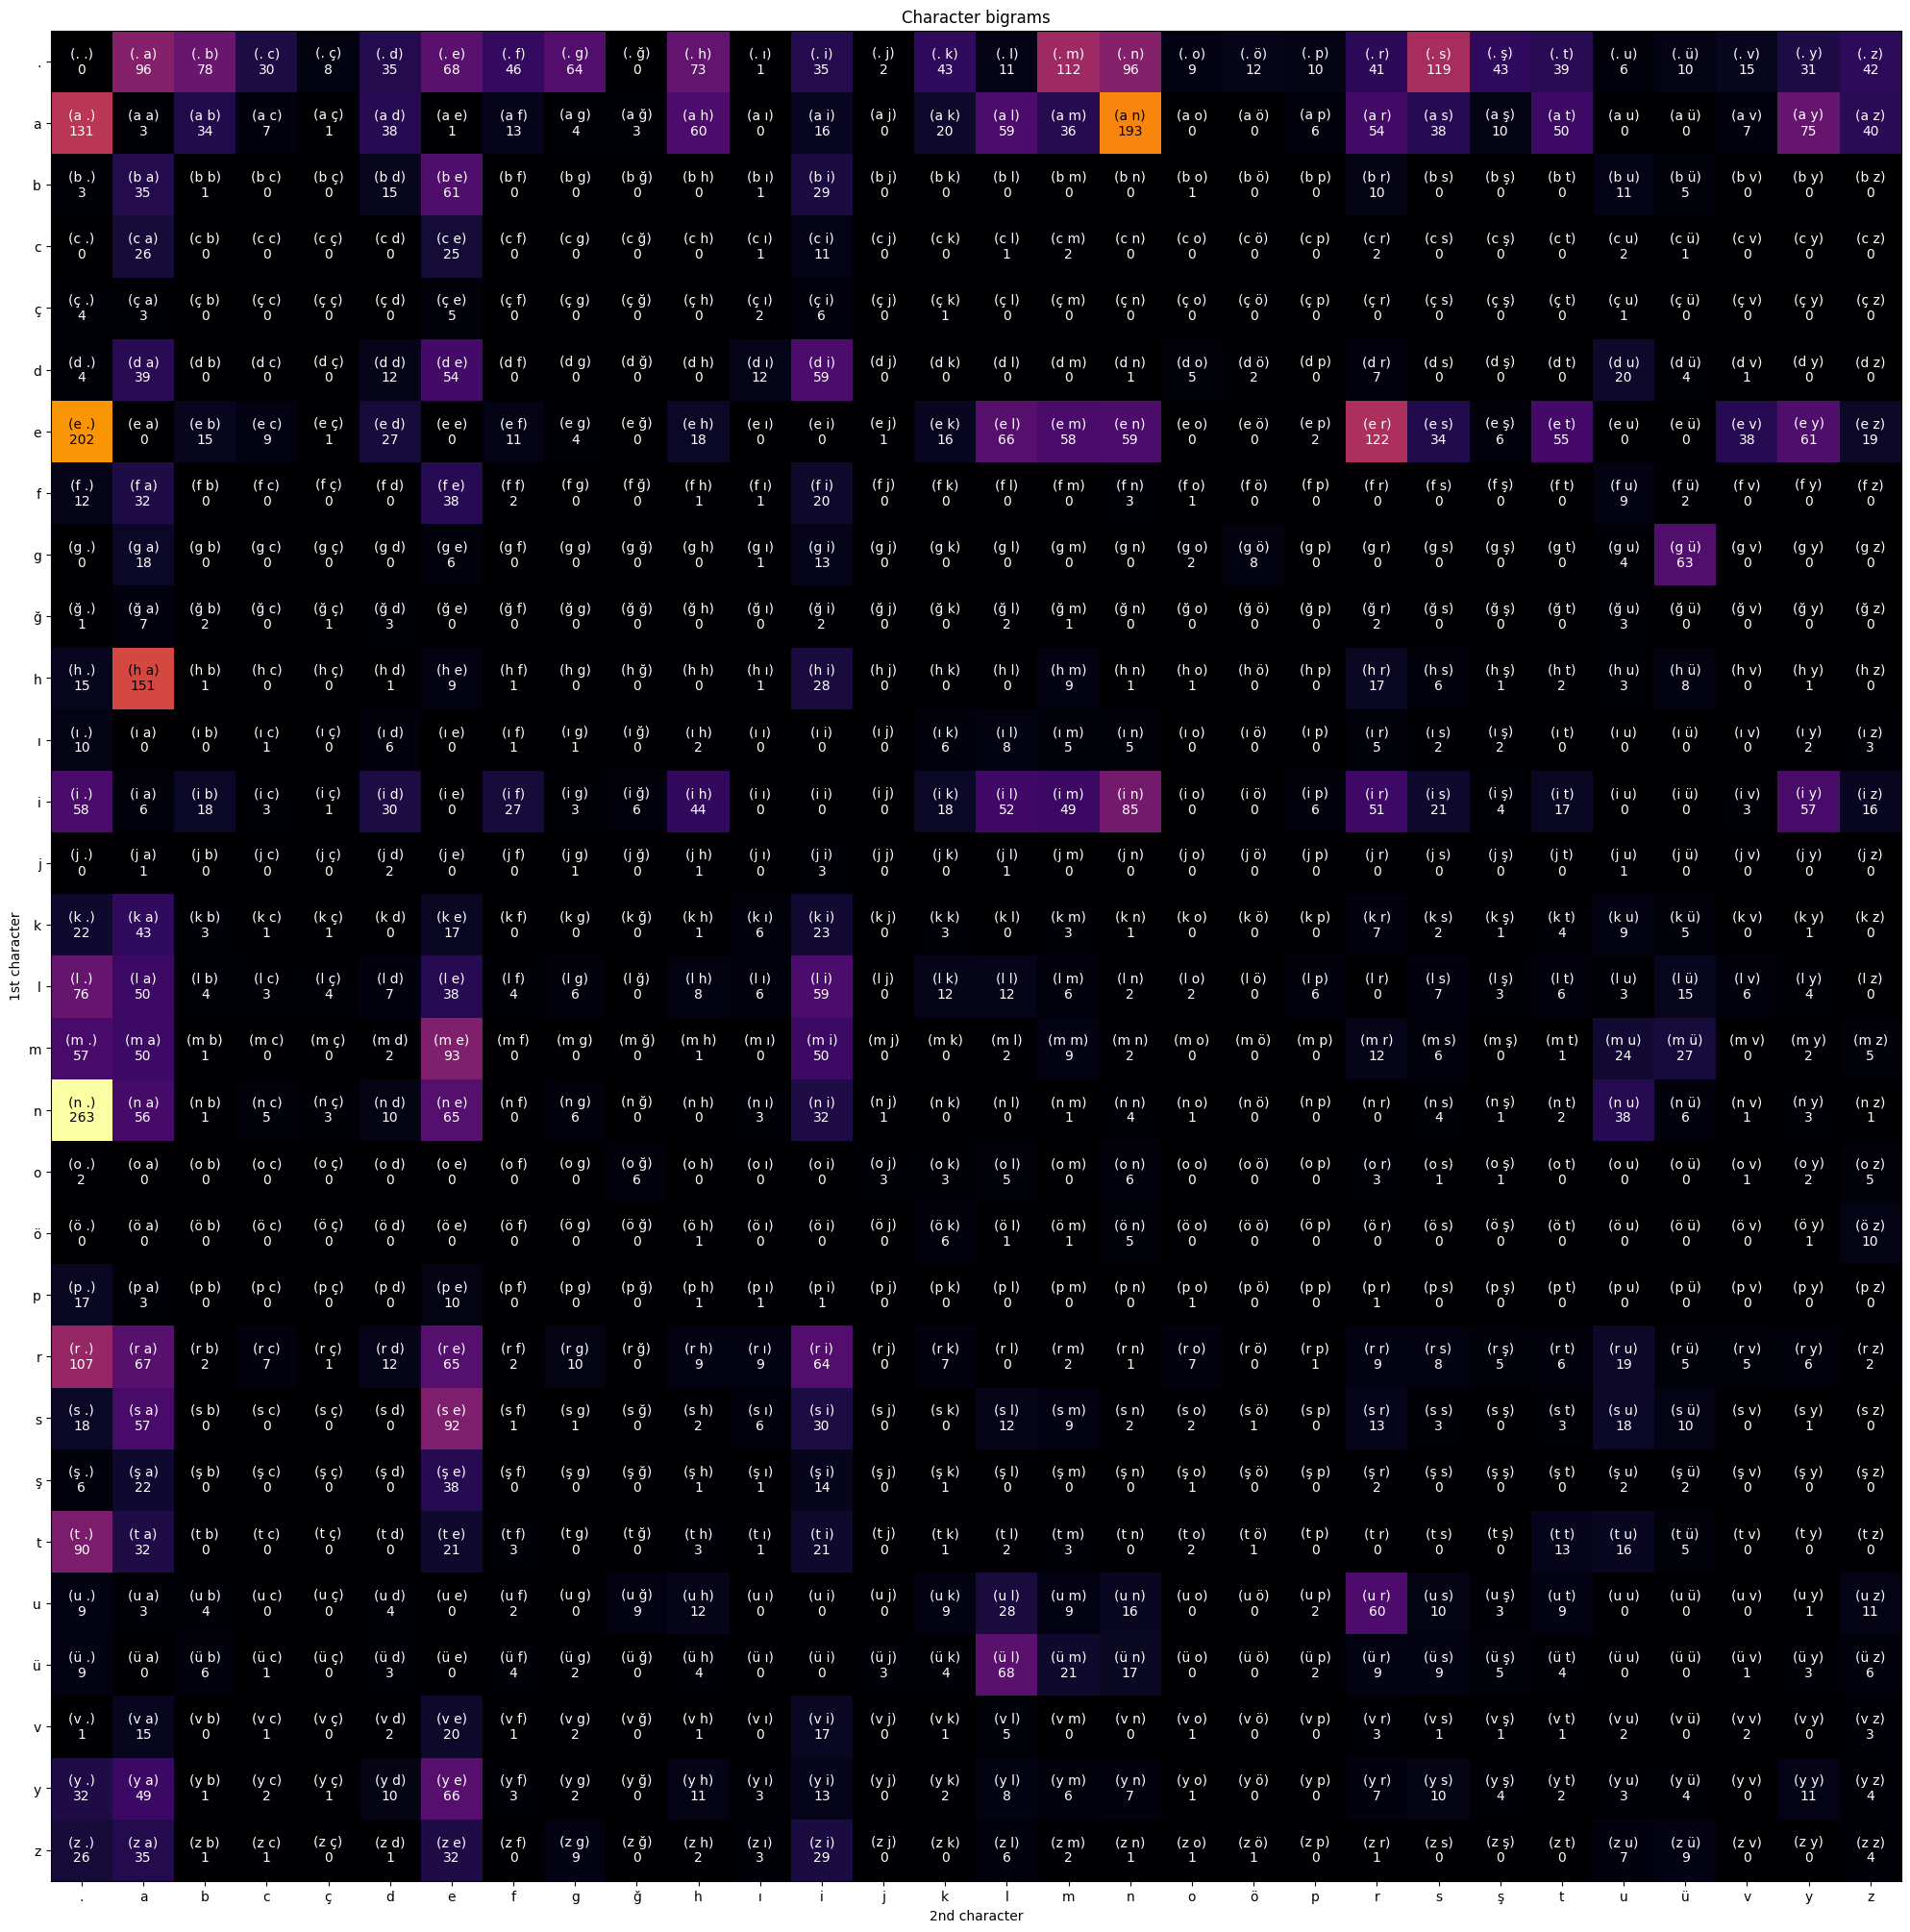

In [146]:
fig, ax = plt.subplots(figsize=(25, 25))
ax = plot_bigrams(B, list(char2ind.keys()), ax)
plt.ylabel("1st character")
plt.xlabel("2nd character")
plt.show()

The table above presents a distribution mapping the initial characters of names (rows) against their terminal characters (columns). Analysis reveals that:
- Names most commonly begin with the character `s` (count 119)
- Names most frequently end with the character `n` (count 263)